<a href="https://colab.research.google.com/github/rsoaresp/bandits_notebooks/blob/master/ucb_mab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy.random import normal, randint, choice

from matplotlib.pylab import plt

In [0]:
class Bandit:

  def __init__(self, num_arms: int):
    self.num_arms = num_arms
    self.avg_arms = self.set_arms_mean_location()

  def set_arms_mean_location(self) -> np.array:
    return normal(loc = 0, scale = 1.0, size = self.num_arms)

  def reward(self, arm_number: int) -> float:
    return normal(loc = self.avg_arms[arm_number], scale = 1, size = 1)

In [0]:
class UCB:
  
  def __init__(self, num_steps: int, c: float):
    self.c = c
    self.num_steps = num_steps

  def run_sim(self, bandit: Bandit) -> np.array:

    reward = np.zeros(self.num_steps)
    best_arm = np.zeros(self.num_steps, dtype=int)

    ucb = np.zeros(bandit.num_arms)
    num_pulls = np.ones(bandit.num_arms)
    arms_reward = np.zeros(bandit.num_arms)

    for i in range(1, self.num_steps):

      arm = self.select_arm(bandit, ucb)

      best_arm[i] = arm
      reward[i] = bandit.reward(arm)

      num_pulls[arm] += 1
      arms_reward[arm] += (reward[i] - arms_reward[arm])/num_pulls[arm]

      ucb = arms_reward + self.c*np.sqrt(np.log(i)/num_pulls)

    return reward

  def select_arm(self, bandit: Bandit, ucb: np.array) -> int:
        return choice(np.where(ucb == ucb.max())[0])

In [0]:
def make_plot(num_steps: int, num_runs: int, c: float, ax):

  ucb_alg = UCB(num_steps, c)
  reward = np.zeros(num_steps)

  for i in range(0, num_runs):
    b = Bandit(10)
    reward += ucb_alg.run_sim(b);
  
  ax.plot(reward/num_runs, label = f'c = {c}')
  return None

Text(0, 0.5, '$\\langle$ reward $\\rangle$')

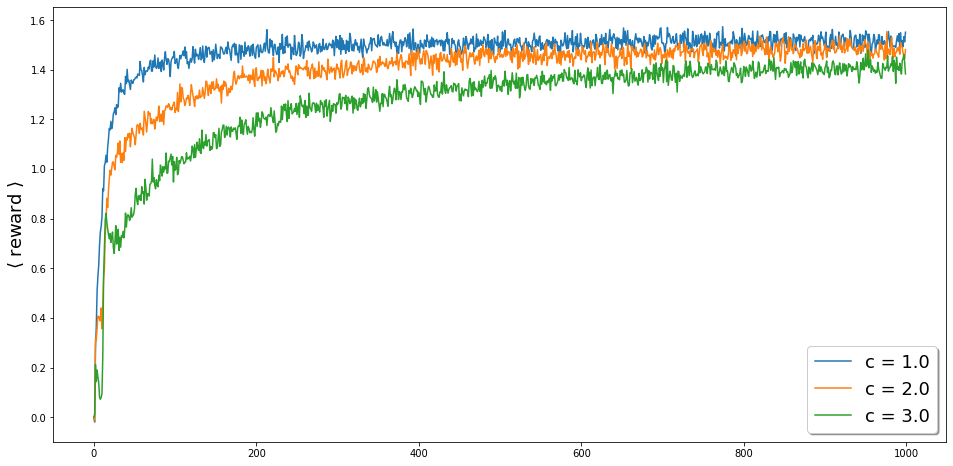

In [26]:
fig, ax = plt.subplots(figsize=(16,8))

for c in [1.0, 2.0, 3.0]:
  make_plot(1000, 2000, c, ax)

ax.legend(loc=0, fancybox=True, shadow=True, fontsize=18)
plt.ylabel(r'$\langle$ reward $\rangle$', fontsize = 18)